Imports & prep

In [3]:
%matplotlib inline
# Basic
from collections import OrderedDict
from datetime import datetime, timedelta
from pathlib import Path
import re
from playsound import playsound
from os import listdir
# Numbers
import pandas as pd
import numpy as np
# Graphic
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib.ticker import FormatStrFormatter
from matplotlib import patheffects as pe
import seaborn as sns
# FFT
from scipy.fftpack import fft, ifft

In [4]:
def ps():
    playsound('C:/Windows/Media/Alarm10.wav')

In [5]:
# SCALING FACTOR
SCALE = 100
DESCALE = 1/SCALE

# AE datastructures
LAGS = 128
TIME_STEPS = 128

# Date parameters
E1 = pd.to_datetime("2020-01-13")
E2 = pd.to_datetime("2020-01-24")
E3 = pd.to_datetime("2020-02-24")
E4 = pd.to_datetime("2020-03-09")

CUT1 = pd.to_datetime("2019-04-29")
CUT2 = pd.to_datetime("2020-06-01")

EXCLUSION = pd.to_datetime("2010-01-01")

# Plot parameters
SCATTER = 25
ALPHA = 0.8
LINEWIDTH = 1.5

TITLE_FONT = {
        'family' : 'normal',
        'weight' : 'bold',
        'size'   : 30
        }

AXIS_FONT = {
        'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15
        }

DATE_FORM  = DateFormatter('%Y-%m-%d')

In [6]:
# Plot settings
%matplotlib inline
plt.style.use('seaborn')
plt.rc('font', **AXIS_FONT)
plt.rc('xtick', labelsize=15)  
plt.rc('ytick', labelsize=15)

Get data

In [7]:
# specify directories
d_base = 'C:/Users/Keegan/OneDrive/1 Studies/2021 - 2022/5003W/3 - Dissertation/5-Data/results/fanomal/intra/ae_results/spx_intra/models/AE[128, 92, 56, 20]__2022-11-30__T_18_22_39/'
d_err = d_base+'error/'
d_pred = d_base+'predictions/'
# get filenames
errn = listdir(d_err)
predn = listdir(d_pred)
# read in data as pd.DataFrames
mse_full = pd.read_csv(d_err+errn[1]).rename({'date':'date','0':'mse'},axis=1).astype({'date':np.datetime64,'mse':float})
mse_test = pd.read_csv(d_err+errn[3]).rename({'date':'date','0':'mse'},axis=1).astype({'date':np.datetime64,'mse':float})
mse_train = pd.read_csv(d_err+errn[5]).rename({'date':'date','0':'mse'},axis=1).astype({'date':np.datetime64,'mse':float})

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


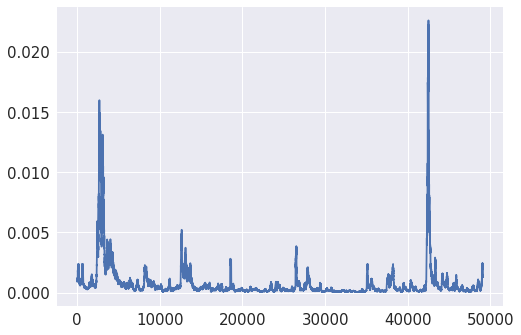

In [8]:
plt.plot(range(len(mse_full.mse.iloc[1:])),mse_full.mse.iloc[1:]*SCALE)

In [9]:
X = fft(mse_full.mse.values)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


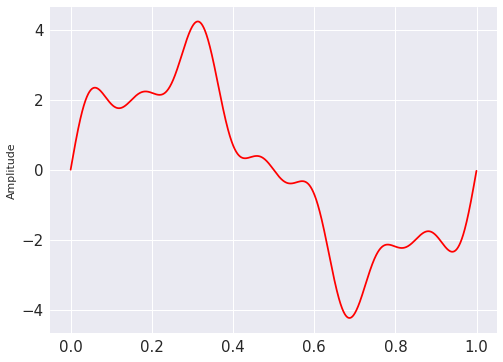

In [10]:
# sampling rate
sr = 2000
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

In [11]:
t.shape

(2000,)

c:\Users\Keegan\anaconda3\envs\ml\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


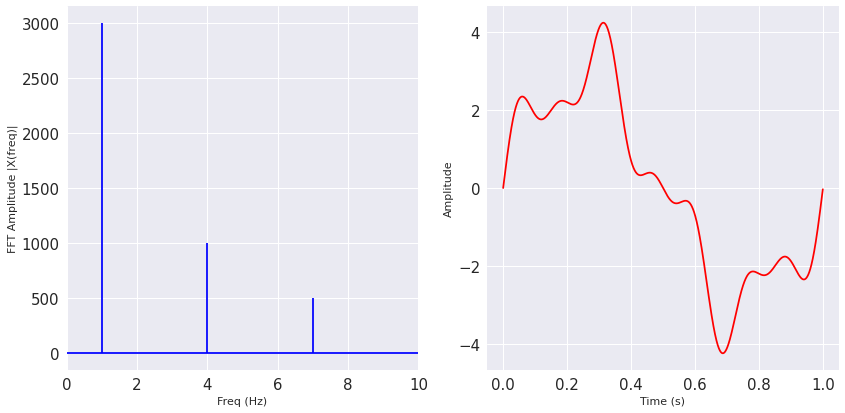

In [12]:
X = fft(x)

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(np.abs(X), 'b', \
         bottom=0, markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

(49114,)


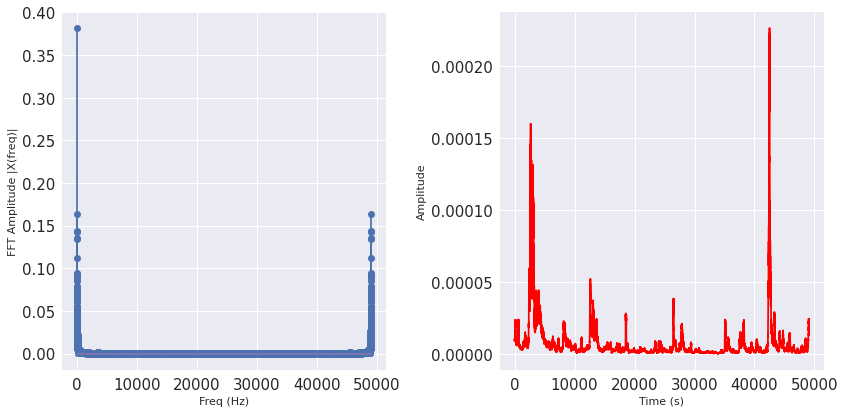

In [13]:
X = fft(mse_full.mse.values[1:])
print(X.shape)

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(np.abs(X))
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
# plt.xlim(0, 100)

plt.subplot(122)
plt.plot(range(len(X)), ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

(34776,)


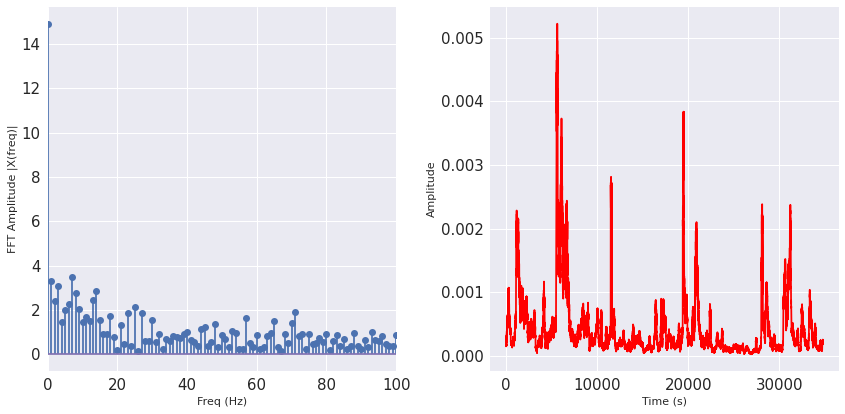

In [14]:
X = fft(mse_train.mse.values[1:]*SCALE)
print(X.shape)

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(np.abs(X)) #np.abs(X)
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 100)


plt.subplot(122)
plt.plot(range(len(X)), ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()

plt.show()

(7180,)


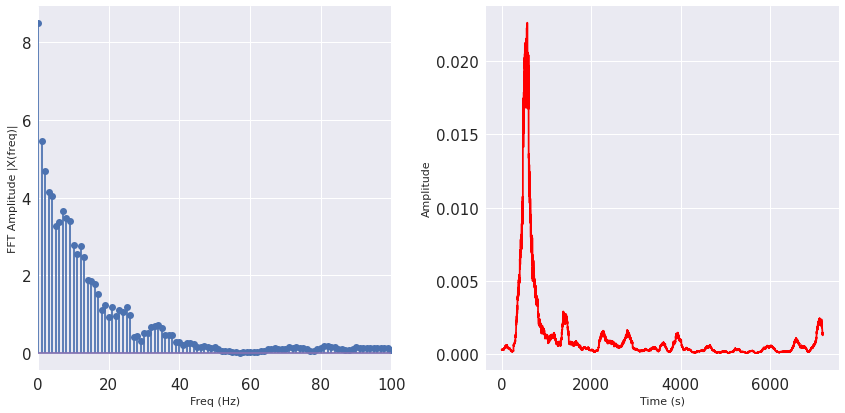

In [15]:
X = fft(mse_test.mse.values*SCALE)
print(X.shape)

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(np.abs(X)) #np.abs(X)
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 100)

plt.subplot(122)
plt.plot(range(len(X)), ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

In [16]:
def divide_chunks(l, n):
    # looping till length l
    for i in range(0, len(l), n):
        yield l[i:i + n]

In [23]:
E4

Timestamp('2020-03-09 00:00:00')

In [57]:
data = pd.DataFrame({'date':mse_full.date.values, 'mse':mse_full.mse.values*SCALE})
s = data[(data.date>=E1) & (data.date<=(E4+timedelta(30)))]
s['fft'] = fft(s.mse.values*SCALE)

s2 = data.iloc[41800:42200]
s2['fft'] = fft(s2.mse.values*SCALE)

s3 = data.iloc[42200:42647]
s3['fft'] = fft(s3.mse.values*SCALE)


C:\Users\Keegan\AppData\Local\Temp\ipykernel_2500\3874251104.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s['fft'] = fft(s.mse.values*SCALE)
C:\Users\Keegan\AppData\Local\Temp\ipykernel_2500\3874251104.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s2['fft'] = fft(s2.mse.values*SCALE)
C:\Users\Keegan\AppData\Local\Temp\ipykernel_2500\3874251104.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

C:\Users\Keegan\AppData\Local\Temp\ipykernel_2500\832441457.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


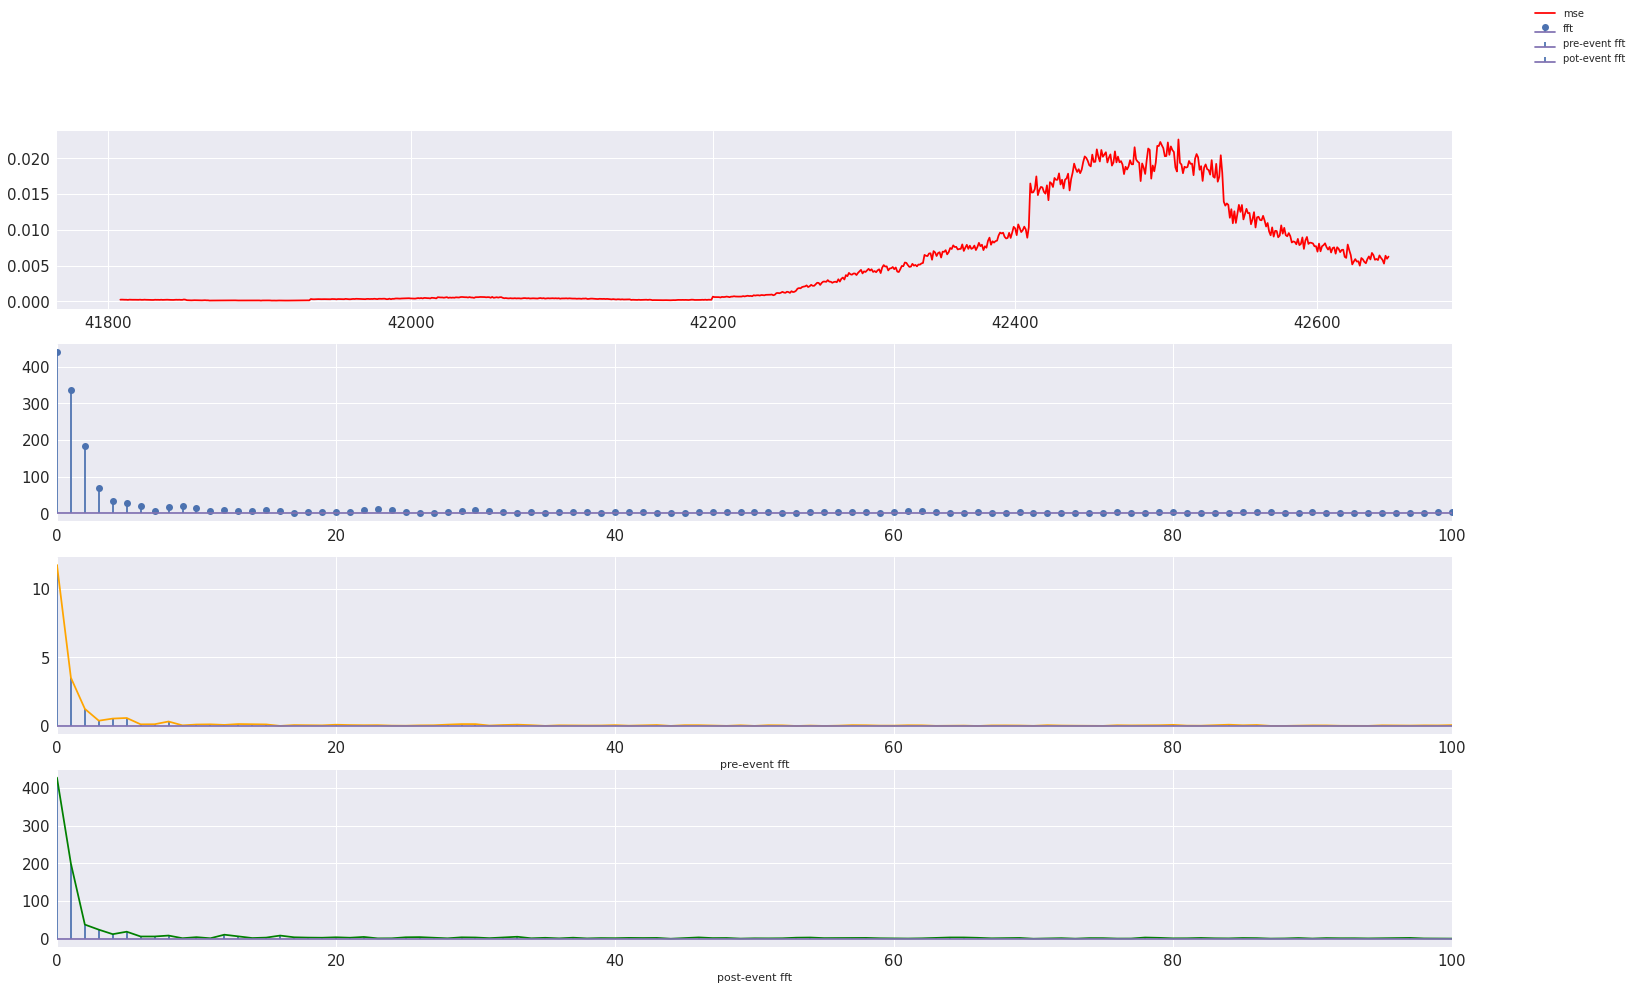

In [64]:
fig, ax = plt.subplots(4)

ax[0].plot(s.mse, label='mse', color='red')

ax[1].stem(np.abs(s.fft), label='fft')
ax[1].set_xlim(0,100)

ax[2].stem(np.abs(s2.fft), label='pre-event fft', markerfmt='orange')
ax[2].set_xlim(0,100)
ax[2].set_xlabel('pre-event fft')

ax[3].stem(np.abs(s3.fft), label='pot-event fft', markerfmt='green')
ax[3].set_xlim(0,100)
ax[3].set_xlabel('post-event fft')


fig.set_figwidth(25)
fig.set_figheight(15)
fig.legend()
fig.show()

c:\Users\Keegan\anaconda3\envs\ml\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


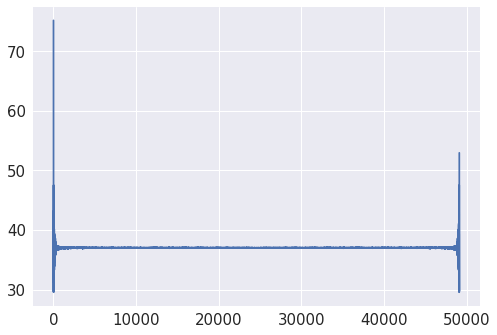

In [32]:
plt.plot(fft(mse_full.mse.values*SCALE))

In [40]:
DAILY_OBS = 2*(16-9) - 1
WEEKLY_OBS = DAILY_OBS*5
MONTHLY_OBS = DAILY_OBS*20

daily = list(divide_chunks(np.abs(X),DAILY_OBS))
weekly = list(divide_chunks(np.abs(X),WEEKLY_OBS))
monthly = list(divide_chunks(np.abs(X),MONTHLY_OBS))

In [51]:
np.abs(X)[0:13]

array([14.91395838,  3.30022303,  2.39182959,  3.05813182,  1.46398684,
        1.99721451,  2.2585206 ,  3.47610521,  2.7584532 ,  2.02025446,
        1.47472628,  1.7028066 ,  1.49022313])

c:\Users\Keegan\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Keegan\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Keegan\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

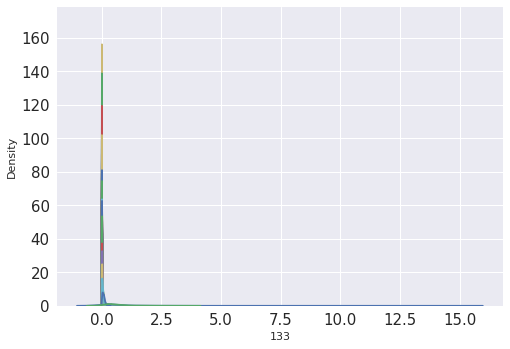

In [60]:
rotated = pd.DataFrame(monthly).transpose()
for col in rotated:
    sns.distplot(rotated[col])

In [ ]:
Xx = pd.DataFrame({'freq':range(len(X)), 'amplitude':X})
Xx[Xx.amplitude>Xx.mean]